## Simple neural network implementation

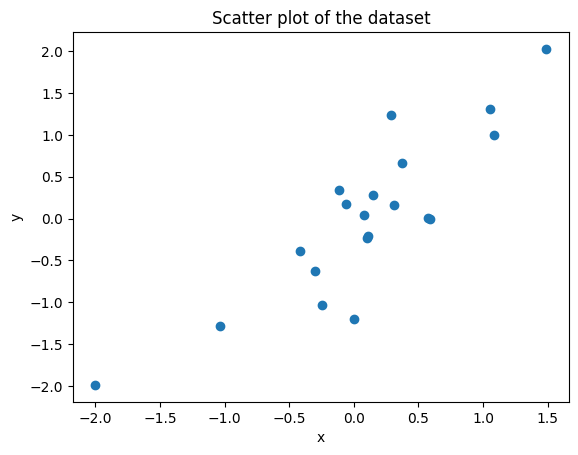

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Creating the dataset
x = torch.randn(20, 1)  # 20 input values
# Assuming a linear-like relationship with some noise
y = x + torch.randn(20, 1)/2

# Displaying the shapes of X and y
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of the dataset')
plt.show()

In [2]:
# Define the model
model = nn.Sequential(
    nn.Linear(1, 1), # input size: 1, output size: 1
    nn.ReLU(), # ReLU activation function
    nn.Linear(1, 1) # input size: 1, output size: 1
)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)


In [3]:
list(model.parameters())

[Parameter containing:
 tensor([[0.0501]], requires_grad=True),
 Parameter containing:
 tensor([-0.3466], requires_grad=True),
 Parameter containing:
 tensor([[-0.4918]], requires_grad=True),
 Parameter containing:
 tensor([-0.7014], requires_grad=True)]

In [4]:
x = (x-x.min())/(x.max()-x.min())
y = (y-y.min())/(y.max()-y.min())

In [5]:
# Initialize the mean squared error (MSE) loss function
loss_function = nn.MSELoss()

# Initialize the optimizer using stochastic gradient descent (SGD) with a learning rate of 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [6]:
# Initialize an empty list to store loss values for each epoch
loss_history = []

# Iterate over 50 epochs
for epoch in range(50):
    # Forward pass: Compute predictions using the current model
    pred = model(x)

    # Compute the loss between predictions and actual values
    loss = loss_function(pred, y)

    # Append the loss value to the loss history list
    loss_history.append(loss)

    # Reset gradients to zero
    optimizer.zero_grad()

    # Backpropagation: Compute gradients of the loss with respect to model parameters
    loss.backward()

    # Update model parameters using the optimizer
    optimizer.step()

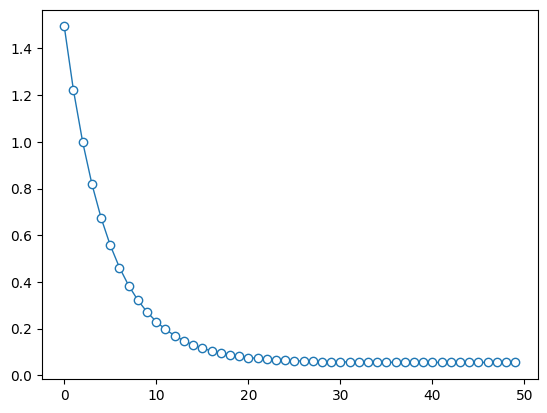

In [7]:
# Plot the loss history
plt.plot([x.detach() for x in loss_history],
         'o-', markerfacecolor='w', linewidth=1)
plt.show()

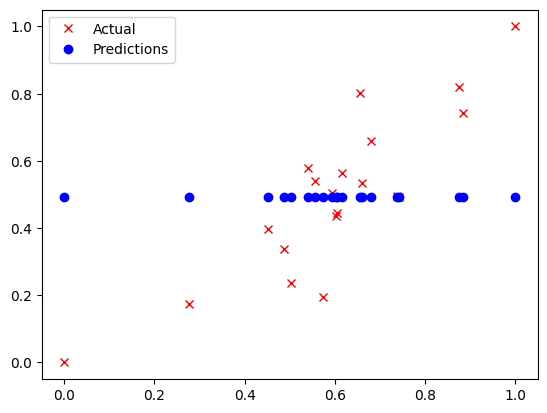

In [8]:
# Generate predictions using the trained model
predictions = model(x)

# Plot actual and predicted values
plt.plot(x, y, 'rx', label="Actual")  # Plot actual values in red crosses
# Plot predicted values in blue circles
plt.plot(x, predictions.detach(), 'bo', label="Predictions")
plt.legend()  # Display legend
plt.show()  # Show plot

## Classifying Handwritten Digits

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

In [10]:
# Define transformations to be applied to the dataset
transform = transforms.Compose([transforms.ToTensor()])

# Download and prepare the training dataset
trainset = datasets.MNIST('train', download=True,
                          train=True, transform=transform)

# Download and prepare the testing dataset
testset = datasets.MNIST('test', download=True,
                         train=False, transform=transform)

# Create data loaders for the training dataset
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=64, shuffle=True)

# Create data loaders for the testing dataset
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting train\MNIST\raw\train-images-idx3-ubyte.gz to train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting train\MNIST\raw\train-labels-idx1-ubyte.gz to train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting train\MNIST\raw\t10k-images-idx3-ubyte.gz to train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting train\MNIST\raw\t10k-labels-idx1-ubyte.gz to train\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting test\MNIST\raw\train-images-idx3-ubyte.gz to test\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting test\MNIST\raw\train-labels-idx1-ubyte.gz to test\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting test\MNIST\raw\t10k-images-idx3-ubyte.gz to test\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting test\MNIST\raw\t10k-labels-idx1-ubyte.gz to test\MNIST\raw



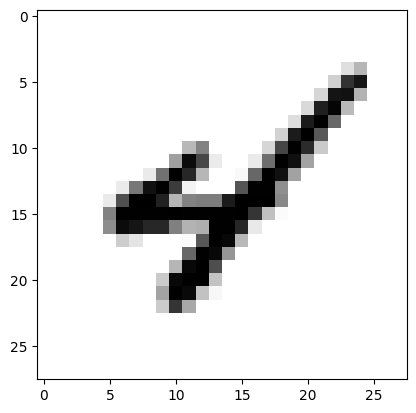

In [12]:
# Retrieve a batch of data containing images and their corresponding labels
for images, labels in train_loader:
    # Display the first image from the batch using Matplotlib
    plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
    break  # Exit the loop after processing the first batch

In [13]:
# Define the neural network architecture using nn.Sequential
model = nn.Sequential(
    # Input layer with 784 units connected to a hidden layer with 64 units
    nn.Linear(784, 64),
    nn.ReLU(),           # Apply ReLU activation function
    # Hidden layer with 64 units connected to another hidden layer with 64 units
    nn.Linear(64, 64),
    nn.ReLU(),           # Apply ReLU activation function
    # Hidden layer with 64 units connected to the output layer with 10 units
    nn.Linear(64, 10),
)

# Print the model architecture
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


In [14]:
# Define the loss function (CrossEntropyLoss) for multiclass classification
lossfn = nn.CrossEntropyLoss()

# Define the optimizer (SGD) with a learning rate of 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [15]:
losses = []  # Initialize a list to store the losses

# Iterate over ten epochs
for epoch in range(10):
    running_loss = 0  # Initialize the running loss for the current epoch

    # Iterate through batches of data from the train_loader
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)  # Flatten the images
        optimizer.zero_grad()  # Zero the gradients
        output = model(images)  # Forward pass
        loss = lossfn(output, labels)  # Compute the loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update the weights
        running_loss += loss.item()  # Accumulate the running loss

    # Calculate and print the average training loss for the current epoch
    print("Epoch {} - Training loss: {}".format(epoch,
          running_loss / len(train_loader)))

    # Append the average training loss to the list of losses
    losses.append(running_loss / len(train_loader))

Epoch 0 - Training loss: 1.7170414787365684
Epoch 1 - Training loss: 0.5803977529218456
Epoch 2 - Training loss: 0.4060330741536389
Epoch 3 - Training loss: 0.3527822844795327
Epoch 4 - Training loss: 0.32342947534978517
Epoch 5 - Training loss: 0.3016222721573386
Epoch 6 - Training loss: 0.2846107675211389
Epoch 7 - Training loss: 0.2704988345821529
Epoch 8 - Training loss: 0.2573549867645383
Epoch 9 - Training loss: 0.24541006863577916


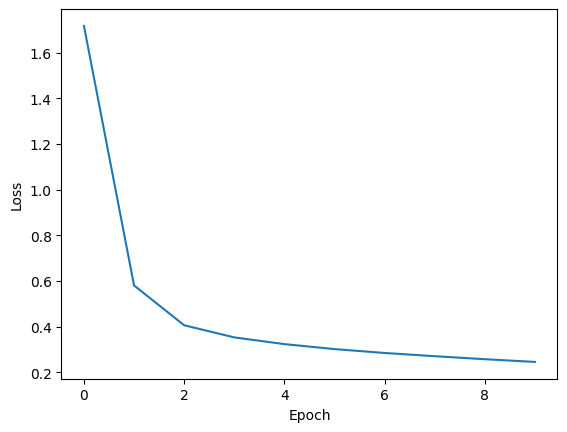

In [16]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

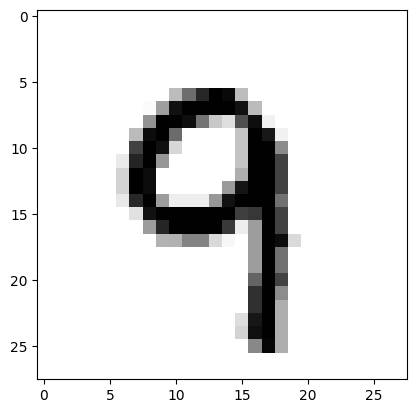

In [19]:
# Retrieve a batch of test images and labels
for testimgs, testlabels in test_loader:
    break  # Exit the loop after retrieving the first batch

# Display the first image from the batch using Matplotlib
plt.imshow(testimgs[0][0].numpy().squeeze(), cmap='gray_r')

In [20]:
# Reshape the image into a 1x784 tensor
img = testimgs[0].view(1, 784)

# Perform inference without gradient tracking
with torch.no_grad():
    # Forward pass to obtain the log probabilities
    logps = model(img)
    # Compute the probabilities by applying the exponential function to the log probabilities
    ps = torch.exp(logps)
    # Convert the tensor to a NumPy array and extract the list of probabilities
    probabilities = list(ps.numpy()[0])
    # Determine the predicted digit by finding the index of the maximum probability
    prediction = probabilities.index(max(probabilities))
    # Print the predicted digit
    print(prediction)

9
